# Comparing scanpy clusters from expression matrix and regulon auc matrix with a voting system

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import scanpy as sc
import anndata as ad
import os
import sklearn

//anaconda3/envs/robin_simulations/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex
//anaconda3/envs/robin_simulations/lib/python3.7/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [2]:
import umap
from sklearn.decomposition import PCA

//anaconda3/envs/robin_pyscenic/lib/python3.6/site-packages/umap/spectral.py:4: NumbaDeprecationWarning: No direct replacement for 'numba.targets' available. Visit https://gitter.im/numba/numba-dev to request help. Thanks!
  import numba.targets


In [3]:
import dtw

In [342]:
OUT_FOLDER = '../../simulated-nuclei_data/OB_pyscenic/fewer_regulons_AUC/correlations'
#PYSCENIC_TABLE_FNAME = "D:Robin/pyscenic/scanpy_clustering/auc_mtx/id_umap_cluster_table.p"
#PYSCENIC_TABLE_FNAME = "../../pyscenic_data/scanpy_clustering/auc_mtx/id_umap_cluster_table.p"
#STANDARD_TABLE_FNAME = "D:Robin/Single_seq_data/cells_and_louvain_ids.p"
#STANDARD_TABLE_FNAME = "../../OB_single_seq_data/cells_and_louvain_ids.p"
#ST_MATRIX_FNAME = "D:Robin/Single_seq_data/single_seq_ex_mtx.p"
#ST_MATRIX_FNAME = "../../OB_single_seq_data/single_seq_ex_mtx.p"
#EX_MTX_FNAME = "D:Robin/pyscenic/ex_matrix.p"
#EX_MTX_FNAME = "../../pyscenic_data/pyscenic_pipeline/ex_matrix.p"

In [3]:
#R1 + R3
#STANDARD_TABLE_FNAME = "../../OB_single_seq_data/cells_and_louvain_R1_R3_ids.p"
#ST_MATRIX_FNAME = "../../OB_single_seq_data/R1_R3_counts_dense.p"


#Stefan's final nuclei
st_folder = "../../OB_single_seq_data/final_nuclei/subcluster_tables"
STANDARD_TABLE_FNAME = os.path.join(st_folder,'st_table.p')
ST_MATRIX_FNAME = os.path.join(st_folder,'st_data.p')

In [2]:
#SIM_FOLDER = 'D:/Robin/simulated-nuclei/only_MT_markers'
SIM_FOLDER = '../../simulated-nuclei_data/OB_pyscenic/final_regulons/TF_times_3_good_replicates'
#SIM_FOLDER = '../../simulated-nuclei_data/Olfactory_Bulb/original_pipeline_revised'
sim_ex_mtx_fname = os.path.join(SIM_FOLDER,'sim_ex_mtx.p')
sim_table_fname = os.path.join(SIM_FOLDER,'sim_id_table.p')

In [5]:
#TFS_FOLDER = "D:\Robin/pyscenic"
TFS_FOLDER = "../../pyscenic_data/pyscenic_pipeline"
MM_TFS_FNAME = os.path.join(TFS_FOLDER, 'mm_tfs.txt')

In [7]:
BULK_AUC_FNAME = "D:Robin/bulk_OB_auc_mtx.p"

### reading in cluster ids

In [26]:
st_table = pickle.load(open(STANDARD_TABLE_FNAME,'rb'))
st_matrix = pickle.load(open(ST_MATRIX_FNAME,'rb'))

In [27]:
mitral_ids = [cell for cell in st_table.index if st_table.loc[cell,'louvain'] in ['M1','M2','M3']]
st_table = st_table.loc[mitral_ids]
st_matrix = st_matrix.loc[mitral_ids]

In [9]:
py_table = pickle.load(open(PYSCENIC_TABLE_FNAME,'rb'))
py_matrix = pickle.load(open(EX_MTX_FNAME,'rb'))

In [6]:
sim_table = pickle.load(open(sim_table_fname,'rb'))
sim_matrix = pickle.load(open(sim_ex_mtx_fname,'rb'))

In [15]:
mt_ex_matrix_fname = os.path.join(SIM_FOLDER,'ex_mtx_MT.p')
mt_ex_mtx = pickle.load(open(mt_ex_matrix_fname,'rb'))

In [11]:
#trying auc matrices
py_auc_fname = "D:\Robin/pyscenic/auc_mtx.p"
py_auc_mtx = pickle.load(open(py_auc_fname,'rb'))

st_auc_fname = "D:Robin/Single_seq_data/standard_clusters_auc_mtx.p"
st_auc_mtx = pickle.load(open(st_auc_fname,'rb'))

In [ ]:
py_matrix

In [11]:
py_100 = py_matrix[[col for col in py_matrix.columns if col in sim_matrix.columns]]

In [12]:
st_100 = st_matrix[[col for col in st_matrix.columns if col in sim_matrix.columns]]

In [ ]:
py_100

In [13]:
#TFs
with open(MM_TFS_FNAME) as f:
    TFs = f.read().splitlines()

In [16]:
#names

In [114]:
st_table.louvain.unique()

array(['T1', 'ET2', 'M1', 'IN_halfET1', 'ET1', 'PG', 'T2', 'M2', 'M3',
       'none'], dtype=object)

In [115]:
#ordered_standard_names = ['6:M1','8:M1B','0:M2', '9:M2B', '12:M3', '4:T1', '2:T2', '3:T3', '1:T4', '5:T5', '10:T6', '11:TE1', '7:TE2', '13:?', '14:??', '15:???']
#ordered_standard_names = ['4:M1','6:M2','2:M2B','7:M3','5:T1','0:T2','1:T3','10:ET1','8:ET2','11:PG','3:IN','9:?','12:??']
ordered_standard_names = ['M1','M2','M3','T1','T2','IN_halfET1','ET1','ET2','PG','none']

In [116]:
len(ordered_standard_names)

10

In [25]:
py_table.louvain.unique()

array(['0:IN1', '4:T2', '8:M3', '3:M1', '7:ET1mixM2', '12:IN4', '6:T3',
       '10:T4', '2:IN2', '1:T1', '9:ET2', '5:IN3', '13:GLIA1', '11:T5',
       '18:??', '15:IN5', '14:?', '17:TE3', '16:GLIA2'], dtype=object)

In [14]:
ordered_pyscenic_names = ['3:M1','8:M3','1:T1','4:T2','6:T3','10:T4','11:T5','9:ET2','17:TE3','7:ET1mixM2','0:IN1','2:IN2','5:IN3','12:IN4','15:IN5','13:GLIA1','16:GLIA2','14:?','18:??']
len(ordered_pyscenic_names)

19

In [7]:
#pyscenic.to_csv("D:Robin/pyscenic/scanpy_clustering/auc_mtx/umap_pyscenic.csv")

### to avoid issues with numbers tagged on to end, just taking the first 16 characters (the actual barcode)

In [38]:
def strip(df,num2take):
    stripped = []
    for cell in df.index:
        stripped.append(cell[0:num2take])
    df['stripped'] = stripped
    return df.set_index('stripped')

In [81]:
st_str = strip(standard,16)
#py_str = strip(pyscenic,16)
ex_str = strip(ex_matrix,16)

In [82]:
ex_T = ex_str.T
st_T = ex_T[[col for col in ex_T.columns if col in st_str.index]]
st_ex_mtx = st_T.T

In [85]:
st_str = st_str.reset_index()
st_ex_mtx = st_ex_mtx.reset_index()
st_ex_mtx.drop(columns = ['stripped'],inplace = True)

In [86]:
st_ex_mtx

Xkr4  Gm1992  Gm37381  Rp1  Sox17  Mrpl15  Lypla1  Gm37988  Tcea1  \
0      51.0     4.0      0.0  0.0    0.0     1.0     0.0      0.0    0.0   
1      61.0     2.0      0.0  0.0    0.0     1.0     0.0      0.0    0.0   
2      34.0     3.0      0.0  0.0    0.0     2.0     0.0      2.0    3.0   
3      25.0     0.0      0.0  0.0    0.0     0.0     0.0      0.0    1.0   
4      34.0     0.0      0.0  0.0    0.0     0.0     0.0      0.0    1.0   
...     ...     ...      ...  ...    ...     ...     ...      ...    ...   
10897   8.0     2.0      0.0  0.0    0.0     2.0     0.0      0.0    0.0   
10898   9.0     2.0      0.0  0.0    0.0     3.0     0.0      0.0    0.0   
10899   9.0     2.0      0.0  0.0    0.0     3.0     0.0      0.0    0.0   
10900  23.0     2.0      0.0  0.0    0.0     0.0     0.0      0.0    1.0   
10901  23.0     2.0      0.0  0.0    0.0     0.0     0.0      0.0    1.0   

       Rgs20  ...  AC132444.6  CT868723.1  AC125178.3  AC125149.3  AC168977.2  \
0        0.0  ...         0.0         0.0         0.0         0.0         0.0   
1        1.0  ...         0.0         0.0         0.0         0.0         0.0   
2        0.0  ...         0.0         0.0         0.0         0.0         0.0   
3        0.0  ...         0.0         0.0         0.0         0.0         0.0   
4        1.0  ...         0.0         0.0         0.0         0.0         0.0   
...      ...  ...         ...         ...         ...         ...         ...   
10897    0.0  ...         0.0         0.0         0.0         0.0         0.0   
10898    0.0  ...         0.0         0.0         0.0         0.0         0.0   
10899    0.0  ...         0.0         0.0         0.0         0.0         0.0   
10900    0.0  ...         0.0         0.0         0.0         0.0         0.0   
10901    0.0  ...         0.0         0.0         0.0         0.0         0.0   

       AC168977.1  AC149090.1  CAAA01118383.1  CAAA01147332.1  eGFP  
0             0.0         7.0             2.0             0.0   0.0  
1             0.0        13.0             1.0             0.0   0.0  
2             0.0        13.0             0.0             0.0   0.0  
3             0.0         2.0             0.0             0.0   0.0  
4             0.0         3.0             0.0             0.0   0.0  
...           ...         ...             ...             ...   ...  
10897         0.0         1.0             1.0             0.0   0.0  
10898         0.0         1.0             0.0             0.0   4.0  
10899         0.0         1.0             0.0             0.0   4.0  
10900         0.0         1.0             0.0             0.0   2.0  
10901         0.0         1.0             0.0             0.0   2.0  

[10902 rows x 25090 columns]

In [92]:
py_str

UMAP_1     UMAP_2     louvain
stripped                                          
AAACGAACATGACTGT   5.145526  -5.941411       0:IN1
AAACGAAGTAGCGTCC  14.782814   9.555422        4:T2
AAACGAATCCGCCTAT   7.415569   7.238784        8:M3
AAACGCTTCCCATAAG  11.469049  11.301435        3:M1
AAACGCTTCTACCCAC   8.040842  11.656331  7:ET1mixM2
...                     ...        ...         ...
TTTGTTGAGTTAGTGA  -0.943864  12.907470    16:GLIA2
TTTGTTGCAAATCGGG  11.504220   0.525496        1:T1
TTTGTTGCACGTAACT  15.475485   3.632422       9:ET2
TTTGTTGCATGAGAAT  13.682165   5.839167       10:T4
TTTGTTGGTAGAGCTG  17.886875   8.824779       10:T4

[13753 rows x 3 columns]

## having cells in standard clusters vote on pyscenic clusters first
## will create a matrix: each row is a standard cluster, each column is a pyscenic cluster

In [10]:
s2p = pd.DataFrame(0,index = ordered_standard_names, columns = ordered_pyscenic_names)

In [ ]:
s2p

In [12]:
def vote(df1,ordered_names_1,df2,ordered_names_2):
    vote_mtx = pd.DataFrame(0,index = ordered_names_1, columns = ordered_names_2)
    
    not_present = 0
    cells_done = 0
    for cell in df1.index.unique():
        if cell not in df2.index:
            not_present = not_present+1
        else: #vote
            cells_done = cells_done+1
            index1 = df1.at[cell,'louvain']
            index2 = df2.at[cell,'louvain']
            try:
                if isinstance(index1,np.ndarray):
                #if type(index1) is 'numpy.ndarray':
                    if isinstance(index2,np.ndarray):
                    #if type(index2) is 'numpy.ndarray': 
                        #need to loop through both
                        for i in range(len(index1)):
                            for j in range(len(index2)):
                                vote_mtx.at[index1[i],index2[j]] = vote_mtx.at[index1[i],index2[j]] + 1
                    else:
                        #only need to loop through index1
                        for i in range(len(index1)):
                            vote_mtx.at[index1[i],index2] = vote_mtx.at[index1[i],index2] + 1
                elif isinstance(index2,np.ndarray):
                #elif type(index2) is 'numpy.ndarray':
                    #need to loop through only index2
                    for j in range(len(index2)):
                        vote_mtx.at[index1,index2[j]] = vote_mtx.at[index1,index2[j]] + 1
                else:
                #both strings!
                    vote_mtx.at[index1,index2] = vote_mtx.at[index1,index2] + 1
            except TypeError:
                print(type(index1),type(index2))

        
   
                            
                
    print("cells done:")
    print(cells_done)
    print("not present: ")
    print(not_present)
    return vote_mtx

In [13]:
def normalize_votes(vote_mtx):
    #want fractions how many cells voted for that cluster, not raw numbers
    return vote_mtx.div(vote_mtx.sum(axis=1), axis=0)

In [14]:
s2p = normalize_votes(vote(st_str,ordered_standard_names,py_str,ordered_pyscenic_names))

cells done:
3504
not present: 
1252


In [15]:
p2s = normalize_votes(vote(py_str,ordered_pyscenic_names,st_str,ordered_standard_names))

cells done:
3504
not present: 
4300


In [16]:
st_str

louvain
stripped                
AAAGAACCATCTGTTT    1:T4
AAAGGATAGCACCGTC    1:T4
AAAGGATTCAAACCTG    1:T4
AAAGGGCCAAGCGCAA    2:T2
AAAGGGCTCGTAGCTA    0:M2
...                  ...
TTTGACTCATCGGAGA    2:T2
TTTGATCAGTTGTAGA    1:T4
TTTGGTTGTGACATCT    0:M2
TTTGTTGAGGCCTGAA    5:T5
TTTGTTGTCTCATTGT   7:TE2

[4761 rows x 1 columns]

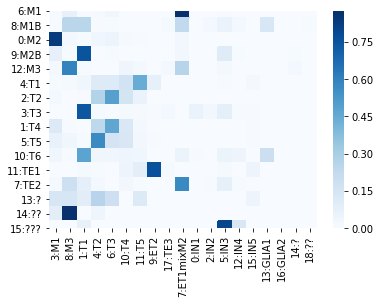

In [179]:
s2p_plt = sns.heatmap(s2p,cmap = "Blues")
s2p_fig = s2p_plt.get_figure()
s2p_fig.savefig('D:Robin/pyscenic/scanpy_clustering/standard_voting_for_pyscenic.png')

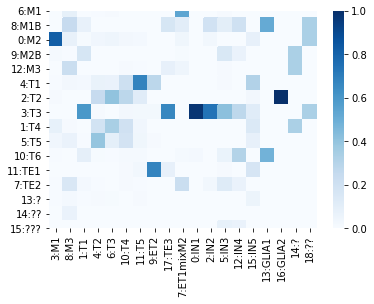

In [180]:
p2s_plt = sns.heatmap(p2s.T,cmap = "Blues")
p2s_fig = p2s_plt.get_figure()
p2s_fig.savefig('D:Robin/pyscenic/scanpy_clustering/pyscenic_voting_for_standard.png')
p2s_fig.savefig('D:Robin/pyscenic/scanpy_clustering/pyscenic_voting_for_standard.svg')

# Correlations

## getting separate dataframes for each cluster

In [350]:
def sep_dfs(cluster_df,ex_matrix,names,attribute):
    #names = list of cluster names
    to_return = [] #list of sep dfs
    for name in names:
        cells_to_take = []
        for cell in cluster_df.index:
            if cluster_df.at[cell,attribute] == name:
                cells_to_take.append(cell)
        to_return.append(ex_matrix.loc[cells_to_take])
    return to_return
        

In [351]:
#takes a long time to run, but works!
def get_avg_mtx(sep_dfs,names):
    avg = pd.DataFrame(0,index=names,columns=sep_dfs[0].columns)
    for i in range(len(sep_dfs)):
        df = sep_dfs[i]
        name = names[i]
        avg.loc[name] = df.mean(axis=0)
    return(avg)

## Organizing correlations into one master function

In [366]:
def correlate(id_table_1,ex_mtx_1,attribute_1,id_table_2,ex_mtx_2 = None,attribute_2 = None,avg_1 = None,avg_2 = None, names_1 = None,names_2 = None, prefix_1 = None, prefix_2 = None, only = None, subset = False):
    #inputs:
        #id table has cell ids and their attributes (eg clusters, replicates)
        #ex_mtx is the expression matrix showing each cell's gene expression
            #if only one is provided, default is to use the same expression matrix for both id tables
        #attribute is which attribute the data should be sorted by - eg clusters would be "louvain"
            #if only one is provided, default is to use the same attribute for both id tables
        #avg (optional): if this attribute, id, and matrix combination have already been used for a correlation, inputting this avg will save time so it doens't have to be computed again
        #names (optional) is the order in which the different instances of the attribute should be ordered when displayed. Default is to use whatever order calling unique() provides.
        #prefix (optional) will be added to the names of the attribute instances for display purposes
        #only (optional): a list. If provided, only genes in this list (eg a list of transcription factors) will be considered.
        #subset (default: False): if True, only correlations between the different datasets, not within them, will be shown 
    #outputs: (corr,fig) and displays figure
        #corr is the table of correlation values used to make the figure
        #fig is the figure (for saving)
            #to save: corr_fig.savefig(FNAME,bbox_inches='tight')
        #avg_1 & ang_2: can be used to save time in future correlations
        
    if ex_mtx_2 is None:
        ex_mtx_2 = ex_mtx_1
    if attribute_2 is None:
        attribute_2 = attribute_1
    
    
    
    if avg_1 is None:
        if names_1 is None:
            names_1 = pd.unique(id_table_1.loc[:,attribute_1])
        #make avg (first have to sep)
        sep_1 = sep_dfs(id_table_1,ex_mtx_1,names_1,attribute_1)
        avg_1 = get_avg_mtx(sep_1,names_1)
    
    if avg_2 is None:
        if names_2 is None:
            names_2 = pd.unique(id_table_2.loc[:,attribute_2])
            
        sep_2 = sep_dfs(id_table_2,ex_mtx_2,names_2,attribute_2)
        avg_2 = get_avg_mtx(sep_2,names_2)
    
    #add prefix (for labels on the side)
    prefix_1 = avg_1.set_index(prefix_1 + avg_1.index.astype(str)) #not sure None will concatenate here
    prefix_2 = avg_2.set_index(prefix_2 + avg_2.index.astype(str))
    
    #print('prefix_1: ',prefix_1)
    #print('prefix_2: ',prefix_2)

    
    #concatenate (will do correlations on this single big matrix)
    big_avg = pd.concat([prefix_1,prefix_2]).dropna(axis=1) #only take columns where both have values
    
    #consider only TFs (optional) and correlate
    if only is not None:
        final_avg = big_avg[[col for col in big_avg.columns if col in only]]
    else:
        final_avg = big_avg
        
    #correlate
    whole_corr = final_avg.T.corr()
    
    #subset so only comparing between datasets, not within datasets
    if subset:
        final_corr = whole_corr.iloc[range(len(avg_1.index),len(final_avg.index)),range(0,len(avg_1.index))]
    else:
        final_corr = whole_corr
        
    corr_plt = sns.heatmap(final_corr)
    corr_fig = corr_plt.get_figure()
    
    return (final_corr,corr_fig,avg_1,avg_2)

## using master function

In [47]:
sim_names = ['9','3','14','15','0','1','2','4','5','6','7','8','10','11','12','13','16','17']

In [46]:
sim_table

general_dataset specific_dataset louvain
0                PCX            PCX_1       2
1                PCX            PCX_1       0
2                PCX            PCX_1       0
3                PCX            PCX_1       9
4                PCX            PCX_1       0
...              ...              ...     ...
2995             AON            AON_3       4
2996             AON            AON_3       1
2997             AON            AON_3       1
2998             AON            AON_3       5
2999             AON            AON_3       0

[3000 rows x 3 columns]

In [ ]:
#standard vs pyscenic to test that correlation function works
(st_py_corr,st_py_fig,st_avg,py_avg) = correlate(st_table,st_matrix,'louvain',py_table,py_matrix,'louvain', names_1 = ordered_standard_names,names_2 = ordered_pyscenic_names, prefix_1 = 'standard_', prefix_2 = '_pyscenic', only = TFs, subset = True)


### simulations vs. pyscenic

#### louvain

In [ ]:
(sim_py_corr,sim_py_fig,sim_avg,py_avg) = correlate(sim_table,sim_matrix,'louvain',py_table,py_100,'louvain', avg_1 = None, avg_2 = None,names_1 = None,names_2 = None, prefix_1 = 'simulated_', prefix_2 = 'pyscenic_', only = None, subset = True)


In [ ]:
(sim_py_corr_TFs,sim_py_fig_TFs,sim_avg,py_avg) = correlate(sim_table,sim_matrix,'louvain',py_table,py_matrix,'louvain', avg_1 = None,avg_2 = None,names_1 = None,names_2 = ordered_pyscenic_names, prefix_1 = 'simulated_', prefix_2 = 'pyscenic_', only = None, subset = True)


#### specific dataset

In [ ]:
(sim_py_corr_sp,sim_py_fig_sp,sim_avg_sp,py_avg) = correlate(sim_table,sim_matrix,'specific_dataset',py_table,py_100,'louvain', avg_1 = None, avg_2 = py_avg,names_1 = None,names_2 = ordered_pyscenic_names, prefix_1 = 'simulated_', prefix_2 = 'pyscenic_', only = None, subset = True)


In [ ]:
(sim_py_corr_sp_TFs,sim_py_sp_fig_TFs,sim_avg_sp,py_avg) = correlate(sim_table,sim_matrix,'specific_datset',py_table,py_matrix,'louvain', avg_1 = sim_avg_sp,avg_2 = py_avg,names_1 = sim_table.specific_dataset.unique(), names_2 = ordered_pyscenic_names, prefix_1 = 'simulated_', prefix_2 = 'pyscenic_', only = TFs, subset = True)
#only TFs

### simulations vs. standard

#### louvain

In [ ]:
(sim_st_corr,sim_st_fig,sim_avg,st_avg) = correlate(sim_table,sim_matrix,'louvain',st_table,st_100,'louvain', avg_1 = None, avg_2 = None,names_1 = None,names_2 = ordered_standard_names, prefix_1 = 'simulated_', prefix_2 = 'standard_', only = None, subset = True)


In [ ]:
(sim_st_corr_TFs,sim_st_fig_TFs,sim_avg,st_avg) = correlate(sim_table,sim_matrix,'louvain',st_table,st_matrix,'louvain', avg_1 = sim_avg, avg_2 = st_avg,names_1 = None,names_2 = ordered_standard_names, prefix_1 = 'simulated_', prefix_2 = 'standard_', only = TFs, subset = True)
#only TFs

#### specific dataset

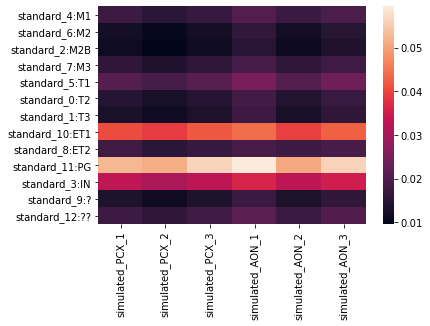

In [367]:
(sim_st_corr_sp,sim_st_fig_sp,sim_avg_sp,st_avg) = correlate(sim_table,sim_matrix,'specific_dataset',st_table,st_matrix,'louvain', avg_1 = None, avg_2 = None,names_1 = None,names_2 = ordered_standard_names, prefix_1 = 'simulated_', prefix_2 = 'standard_', only = None, subset = True)


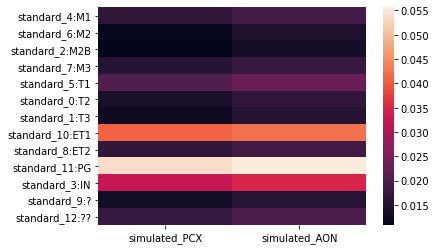

In [368]:
(sim_st_corr_g,sim_st_fig_g,sim_avg_g,st_avg) = correlate(sim_table,sim_matrix,'general_dataset',st_table,st_matrix,'louvain', avg_1 = None, avg_2 = st_avg,names_1 = None,names_2 = ordered_standard_names, prefix_1 = 'simulated_', prefix_2 = 'standard_', only = None, subset = True)


In [ ]:
(sim_py_corr_sp,sim_py_fig_sp,sim_avg_sp,st_avg) = correlate(sim_table,sim_matrix,'specific_dataset',py_table,py_matrix_mt,'louvain', avg_1 = None, avg_2 = None,names_1 = None,names_2 = ordered_pyscenic_names, prefix_1 = 'simulated_', prefix_2 = 'pyscenic_', only = None, subset = True)


In [ ]:
(sim_py_corr_g,sim_py_fig_g,sim_avg_g,st_avg) = correlate(sim_table,sim_matrix,'general_dataset',py_table,py_matrix_mt,'louvain', avg_1 = None, avg_2 = None,names_1 = None,names_2 = ordered_pyscenic_names, prefix_1 = 'simulated_', prefix_2 = 'pyscenic_', only = None, subset = True)

In [ ]:
(sim_st_corr_l,sim_st_fig_l,sim_avg_l,st_avg) = correlate(sim_table,sim_matrix,'louvain',st_table,mt_ex_mtx,'louvain', avg_1 = None, avg_2 = st_avg,names_1 = None,names_2 = ordered_standard_names, prefix_1 = 'simulated_', prefix_2 = 'standard_', only = None, subset = True)


In [ ]:
(sim_st_corr_sp_TFs,sim_st_sp_fig_TFs,sim_avg_sp,st_avg) = correlate(sim_table,sim_matrix,'specific_dataset',st_table,st_matrix,'louvain', avg_1 = sim_avg_sp, avg_2 = st_avg,names_1 = None,names_2 = ordered_standard_names, prefix_1 = 'simulated_', prefix_2 = 'standard_', only = TFs, subset = True)
#only TFs

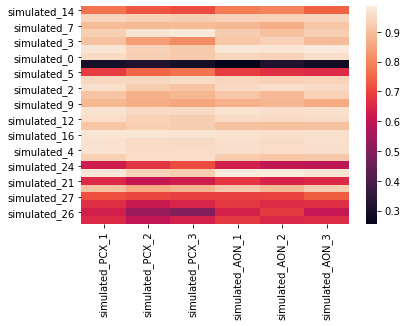

In [92]:
(sim_sim_corr,sim_sim_fig,_,__) = correlate(sim_table,sim_matrix,'specific_dataset',sim_table,sim_matrix,'louvain', avg_1 = None, avg_2 = None,names_1 = None,names_2 = None, prefix_1 = 'simulated_', prefix_2 = 'simulated_', only = None, subset = True)


In [93]:
#SAVING EVERYTHING
sim_py_fig.savefig('sim_py_all_louvain',bbox_inches='tight')
#sim_py_fig_TFs.savefig('sim_py_TFs_louvain',bbox_inches='tight')
sim_st_fig.savefig('sim_st_all_louvain',bbox_inches='tight')
#sim_st_fig_TFs.savefig('sim_st_TFs_louvain',bbox_inches='tight')

sim_py_fig_sp.savefig('sim_py_all_dataset',bbox_inches='tight')
#sim_py_sp_fig_TFs.savefig('sim_py_TFs_dataset',bbox_inches='tight')
sim_st_fig_sp.savefig('sim_st_all_dataset',bbox_inches='tight')
sim_st_fig_g.savefig('sim_st_all_general_dataset',bbox_inches='tight')
#sim_st_sp_fig_TFs.savefig('sim_st_TFs_dataset',bbox_inches='tight')
sim_sim_fig.savefig('sim_sim',bbox_inches='tight')

In [ ]:
#sim_auc_table.columns = ['UMAP_1','UMAP_2','louvain','specific_dataset','general_dataset']

In [ ]:
(sim_py_auc_corr,sim_py_auc_fig,sim_auc_avg,py_auc_avg) = correlate(sim_auc_table,sim_auc_mtx,'specific dataset',py_table,py_auc_mtx,'louvain', avg_1 = None, avg_2 = None,names_1 = None,names_2 = ordered_pyscenic_names, prefix_1 = 'simulated_auc_', prefix_2 = 'pyscenic_auc_', only = None, subset = True)


In [ ]:
#sim_dataset_names = ['PCX_1','PCX_2','PCX_3','AON_1','AON_2','AON_3']

In [ ]:
(sim_py_auc_corr_g,sim_py_auc_fig_g,sim_auc_avg_g,py_auc_avg) = correlate(sim_auc_table,sim_auc_mtx,'general dataset',py_table,py_auc_mtx,'louvain', avg_1 = None, avg_2 = py_auc_avg,names_1 = None,names_2 = ordered_pyscenic_names, prefix_1 = 'simulated_auc_', prefix_2 = 'pyscenic_auc_', only = None, subset = True)

In [51]:
sim_py_fig_sp.savefig('sim_py_mt_specific',bbox_inches='tight')
sim_py_fig_g.savefig('sim_py_mt_general',bbox_inches='tight')
#sim_st_fig_l.savefig('sim_st_mt_louvain',bbox_inches='tight')

## Using bulk AUC mtx as 'average expression'

In [ ]:
bulk_auc = pickle.load(open(BULK_AUC_FNAME,'rb'))

In [ ]:
bulk_prefix = bulk_auc.set_index('bulk_' + bulk_auc.index.astype(str))

In [ ]:
sc_auc = pickle.load(open('D:Robin/pyscenic/auc_mtx.p','rb'))

In [ ]:
sc_auc

In [ ]:
pyscenic

In [ ]:
py_regulon_sep = sep_dfs(pyscenic,sc_auc,ordered_pyscenic_names)

In [ ]:
py_reg_avg = get_avg_mtx(py_regulon_sep,ordered_pyscenic_names)

In [ ]:
py_reg_prefix = py_reg_avg.set_index('pyscenic_' + py_reg_avg.index.astype(str))

In [ ]:
bulk_py = pd.concat([bulk_prefix,py_reg_prefix])

In [ ]:
bulk_py

In [ ]:
whole_corr = bulk_py.T.corr()

subset = whole_corr.iloc[range(len(bulk_auc.index),len(bulk_py.index)),range(0,len(bulk_auc.index))]

corr_plt = sns.heatmap(subset)
corr_fig = corr_plt.get_figure()
corr_fig.savefig('D:Robin/correlations_bulk_auc_vs_pyscenic_regulon_expression.png',bbox_inches='tight')

# Embedding New Data in an Existing UMAP

In [91]:
#st_auc_concat = pd.concat(sep_dfs(st_table,st_auc_mtx,ordered_standard_names,'louvain')) #so only take cells that are in st_table
st_concat = pd.concat(sep_dfs(st_table,st_matrix,ordered_standard_names,'louvain')) #so only take cells that are in st_table

In [92]:
st_concat.to_pickle(ST_MATRIX_FNAME)

In [33]:
mtx_concat = []
table_concat = []
for i in range(0,6):
    table_concat.append(sim_table[i*1500:i*1500+500])
    mtx_concat.append(sim_matrix[i*1500:i*1500+500])
    #print(i*1500)
    #print(i*1500 + 500)
sim_mtx_500 = pd.concat(mtx_concat)
sim_table_500 = pd.concat(table_concat)

In [ ]:
sim_mtx_500

In [39]:
py_matrix_mt = py_matrix[[col for col in py_matrix.columns if col in mt_st_concat.columns]]

In [30]:
def embed_umap(matrix1,table1,attribute1,names1,matrix2,table2,attribute2,names2,colormap1='gist_rainbow',colormap2='gist_rainbow',umap1=None):
    #inputs:
        #matrix1 and matrix2 are the expression matrices (or AUC matrices) of gene expression
        #table1 and table1 have cell ids and their attributes (eg clusters, replicates)
        #names is the order in which the different instances of the attribute should be ordered along the colorbar
        #attribute is which attribute the data should be colored by - eg clusters would be "louvain"
        #colormap1 (optional) is the colormap used for the first umap (default: coolwarm)
        #colormap2 (optional) is the colormap used for the second dataset in the second umap (default: coolwarm)
        #umap1 (optional): umap for first set of inputs so it does not need to be recalculated for each comparison    
    #outputs:
        #umap1
        
    
    #set up names of matrices
    table1["color"] = table1.replace(dict(zip(names1, range(0,len(names1)))) )[attribute1]
    table2["color"] = table2.replace(dict(zip(names2, range(0,len(names2)))) )[attribute2]
    
    #calculate and plot umap of matrix 1
    if umap1 is None:
        umap1 = umap.UMAP(n_neighbors=20, random_state=6).fit(matrix1)
    plt.pyplot.figure(1)
    plt.pyplot.scatter(umap1.embedding_[:, 0], umap1.embedding_[:, 1], s= 5, c= table1['color'], cmap=plt.pyplot.cm.get_cmap(colormap1, len(names1)) )
    plt.pyplot.colorbar()
    print(names1)
    
    #calculate and plot umap of matrix 2, with umap 1 in grey underneath
    new_embedding = umap1.transform(matrix2)
    plt.pyplot.figure(2)
    plt.pyplot.scatter(umap1.embedding_[:, 0], umap1.embedding_[:, 1], s= 5, c= table1['color'], cmap=plt.pyplot.cm.get_cmap('copper', len(names1)),alpha=0.75)
    plt.pyplot.colorbar()
    plt.pyplot.scatter(new_embedding[:, 0], new_embedding[:, 1], s= 5,c=table2['color'],cmap=plt.pyplot.cm.get_cmap(colormap2, len(names2)),alpha=0.75, marker= plt.markers.MarkerStyle('o',fillstyle='none'))
    plt.pyplot.colorbar()
    print(names2)
    
    return umap1

In [ ]:
py_umap = embed_umap(py_100,py_table,'louvain',ordered_pyscenic_names,sim_matrix,sim_table,'general_dataset',['AON','PCX'],colormap2= 'coolwarm')

In [ ]:
st_umap = embed_umap(st_concat,st_table,'louvain',ordered_standard_names,sim_matrix,sim_table,'general_dataset',['AON','PCX'],colormap2= 'coolwarm')

In [ ]:
sim_umap = embed_umap(sim_matrix,sim_table,'general_dataset',['AON','PCX'],py_100,py_table,'louvain',ordered_pyscenic_names, colormap1= 'coolwarm',umap1=sim_umap)

In [ ]:
sim_umap = embed_umap(sim_matrix,sim_table,'general_dataset',['AON','PCX'],st_concat,st_table,'louvain',ordered_standard_names, colormap1= 'coolwarm',umap1=sim_umap)

In [ ]:
#py, then embed standard - gene expression
_ = embed_umap(py_matrix,py_table,'louvain',ordered_pyscenic_names, st_mtx_concat,st_table,'louvain',ordered_standard_names)

['3:M1', '8:M3', '1:T1', '4:T2', '6:T3', '10:T4', '11:T5', '9:ET2', '17:TE3', '7:ET1mixM2', '0:IN1', '2:IN2', '5:IN3', '12:IN4', '15:IN5', '13:GLIA1', '16:GLIA2', '14:?', '18:??']


In [ ]:
st_auc_umap = embed_umap(st_auc_concat,st_table,'louvain',ordered_standard_names,sim_auc_mtx,sim_table,'general dataset',['PCX','AON'])

In [ ]:
_ = embed_umap(st_auc_concat,st_table,'louvain',ordered_standard_names,sim_auc_mtx,sim_table,'louvain',sim_table.louvain.unique())

In [ ]:
_ = embed_umap(py_auc_mtx,py_table,'louvain',ordered_pyscenic_names,sim_auc_mtx,sim_table,'louvain',sim_table.louvain.unique())

## Embedding PCA

In [33]:
def embed_pca(matrix1,table1,attribute1,names1,matrix2,table2,attribute2,names2,colormap1='gist_rainbow',colormap2='gist_rainbow',num_components=40,components=[1,2]):
    #inputs:
        #matrix1 and matrix2 are the expression matrices (or AUC matrices) of gene expression
        #table1 and table1 have cell ids and their attributes (eg clusters, replicates)
        #names is the order in which the different instances of the attribute should be ordered along the colorbar
        #attribute is which attribute the data should be colored by - eg clusters would be "louvain"
        #colormap1 (optional) is the colormap used for the first umap (default: coolwarm)
        #colormap2 (optional) is the colormap used for the second dataset in the second umap (default: coolwarm)
        #components (optional): PCs to plot. (default: [1,2] for PC1 and PC2)
    #outputs:
      
        
    
    #set up names of matrices
    table1["color"] = table1.replace(dict(zip(names1, range(0,len(names1)))) )[attribute1]
    table2["color"] = table2.replace(dict(zip(names2, range(0,len(names2)))) )[attribute2]
    
    #calculate and plot umap of matrix 1
    pca = PCA(n_components=num_components)
    pca.fit(matrix1)
    pca1 = pca.transform(matrix1)
    #first figure
    plt.pyplot.figure(1)
    plt.pyplot.scatter(pca1[:, components[0]-1], pca1[:, components[1]-1], s= 5,c= table1["color"],cmap=plt.pyplot.cm.get_cmap(colormap1, len(names1)),alpha=0.5)
    plt.pyplot.colorbar()
    print(names1)
    
    #calculate and plot pca of matrix 2, with pca 1 in copper underneath
    pca2 = pca.transform(matrix2)
    plt.pyplot.figure(2)
    plt.pyplot.scatter(pca1[:, components[0]-1], pca1[:, components[1]-1], s= 5,c= table1["color"],cmap=plt.pyplot.cm.get_cmap('copper', len(names1)),alpha=0.5)
    plt.pyplot.colorbar()
    plt.pyplot.scatter(pca2[:, components[0]-1], pca2[:, components[1]-1], s= 5,c= table2["color"],cmap=plt.pyplot.cm.get_cmap(colormap2, len(names2)),alpha=0.5)
    plt.pyplot.colorbar()
    print(names2)
    
    return pca1

In [ ]:
embed_pca(sim_matrix,sim_table,'general_dataset',['AON','PCX'],st_concat,st_table,'louvain',ordered_standard_names, colormap1= 'coolwarm',num_components=20,components=[3,4])

In [ ]:
embed_pca(sim_matrix,sim_table,'general_dataset',['AON','PCX'],py_100,py_table,'louvain',ordered_pyscenic_names, colormap1= 'coolwarm',num_components=20,components=[3,4])

In [ ]:
py_pca = embed_pca(py_100,py_table,'louvain',ordered_pyscenic_names,sim_matrix,sim_table,'general_dataset',['AON','PCX'], colormap2= 'coolwarm',num_components=20)

In [ ]:
sim_pca = embed_pca(sim_matrix,sim_table,'louvain',sim_table.louvain.unique(),mt_st_concat,st_table,'louvain',ordered_standard_names, colormap1= 'coolwarm',num_components=5)

# CCA

In [39]:
import rcca #pyrcca

In [46]:
cca = rcca.CCA(kernelcca = False, reg = 0.1, numCC = 2)

In [ ]:
cca.train([sim_matrix,st_concat])

In [ ]:
validation = cca.validate([sim_matrix, st_concat]) #probably shouldn't be doing this on the same data

In [47]:
#transposed - just my random idea so at least genes are matched up between them
cca.train([sim_matrix.T,st_concat.T])

Training CCA, kernel = None, regularization = 0.1000, 2 components


In [51]:
testcorrs_st = cca.validate([sim_matrix.T,st_concat.T])

In [52]:
testcorrs_st

[array([-0.06542629, -0.3189082 , -0.35445585, ..., -0.21659906,
         0.27631661,  0.23013293]),
 array([ 0.03290783, -0.0275972 , -0.01508793, ...,  0.02647156,
         0.05761984, -0.13655596])]

In [54]:
print('Canonical Correlation per Component Pair: ',cca.cancorrs)
print('% Shared Varinance:',cca.cancorrs**2)

Canonical Correlation per Component Pair:  [0.99999995 0.99999997]
% Shared Varinance: [0.99999989 0.99999993]


In [70]:
#First CV for sim_matrix.T
len(cca.comps[0][:,0])
#I guess this shows contribution of each gene

3746

In [69]:
cca.ws[0]

array([[ 2.95971631e-06, -9.46864420e-06],
       [ 1.00023409e-05, -2.31846144e-05],
       [ 6.17743358e-06, -7.62948140e-06],
       ...,
       [ 3.13033981e-06,  1.69498737e-05],
       [-1.39528754e-05,  4.23433279e-05],
       [-5.14792653e-05, -6.65256332e-05]])

In [66]:
sim_matrix.T

0      1      2      3      4      5      6      7      8      \
Rp1                0      0      0      0      0      0      0      0      0   
Rgs20              0      0      0      0      0      0      0      0      0   
St18               0      0      0      0      0      0      1      0      0   
3110035E14Rik      0      0      0      0      0      0      0      0      0   
Mybl1              0      0      0      0      0      0      0      0      0   
...              ...    ...    ...    ...    ...    ...    ...    ...    ...   
Tcf7l2             1      1      0      0      0      1      1      0      0   
Fam160b1           1      1      0      0      2      1      1      1      0   
Slc18a2            0      1      0      0      0      0      0      0      0   
Prlhr              0      0      0      0      0      0      0      1      0   
Grk5               0      0      0      0      0      0      0      0      0   

               9      ...  11990  11991  11992  11993  11994  11995  11996  \
Rp1                0  ...      0      0      0      0      0      0      0   
Rgs20              0  ...      0      0      0      0      0      0      0   
St18               0  ...      0      0      0      0      0      0      0   
3110035E14Rik      0  ...      0      0      0      0      0      0      0   
Mybl1              0  ...      0      0      0      0      0      0      0   
...              ...  ...    ...    ...    ...    ...    ...    ...    ...   
Tcf7l2             1  ...      0      1      0      0      0      0      0   
Fam160b1           0  ...      0      0      2      0      0      2      0   
Slc18a2            0  ...      0      1      0      0      0      0      0   
Prlhr              0  ...      0      0      0      0      0      0      0   
Grk5               0  ...      0      0      0      0      0      0      0   

               11997  11998  11999  
Rp1                0      0      0  
Rgs20              0      0      0  
St18               0      0      0  
3110035E14Rik      0      0      0  
Mybl1              0      0      0  
...              ...    ...    ...  
Tcf7l2             1      1      0  
Fam160b1           0      0      0  
Slc18a2            0      0      0  
Prlhr              0      1      0  
Grk5               0      0      0  

[3746 rows x 12000 columns]

In [71]:
sim_transformed = sim_matrix.copy()

In [73]:
# applying CV1 (I think)
for i in range(0,len(cca.comps[0][:,0])):
    sim_transformed[sim_matrix.columns[i]] = sim_matrix[sim_matrix.columns[i]] * cca.comps[0][:,0][i]

In [76]:
st_transformed = st_concat.copy()

In [77]:
for i in range(0,len(cca.comps[0][:,0])):
    st_transformed[st_concat.columns[i]] = st_concat[st_concat.columns[i]] * cca.comps[0][:,0][i]

In [ ]:
transformed_sim_umap = embed_umap(sim_transformed,sim_table,'general_dataset',['AON','PCX'],st_transformed,st_table,'louvain',ordered_standard_names, colormap1= 'coolwarm')

In [ ]:
transformed_st_umap = embed_umap(st_transformed,st_table,'louvain',ordered_standard_names,sim_transformed,sim_table,'general_dataset',['AON','PCX'],colormap2= 'coolwarm')

In [81]:
py_transformed = py_100.copy()

In [82]:
for i in range(0,len(cca.comps[0][:,0])):
    py_transformed[py_100.columns[i]] = py_100[py_100.columns[i]] * cca.comps[0][:,0][i]

In [ ]:
transformed_sim_umap_py = embed_umap(sim_transformed,sim_table,'general_dataset',['AON','PCX'],py_transformed,py_table,'louvain',ordered_pyscenic_names, colormap1= 'coolwarm')

In [ ]:
transformed_py_umap = embed_umap(py_transformed,py_table,'louvain',ordered_pyscenic_names,sim_transformed,sim_table,'general_dataset',['AON','PCX'],colormap2= 'coolwarm')

In [ ]:
sim_transformed

In [60]:
from sklearn.cross_decomposition import CCA

In [61]:
sk_cca = CCA(n_components=2)

In [63]:
sk_cca.fit(sim_matrix.T, st_concat.T)

CCA()

In [64]:
X_c, Y_c = sk_cca.transform(sim_matrix.T, st_concat.T)

In [74]:
X_c

array([[ -0.30912931, -66.25393576],
       [ -0.30912931, -66.25393576],
       [  1.49778834, -29.00849856],
       ...,
       [  0.67434519, -39.52726485],
       [ -0.14599581, -63.37496101],
       [  0.69821929, -48.3358347 ]])

# Linear Discriminant Analysis (LDA)

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [11]:
LDA = LinearDiscriminantAnalysis()

### first test by splitting standard into test and train

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(st_matrix,st_table['louvain'])

In [13]:
LDA.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [14]:
test = LDA.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
confusion_matrix(y_test, test,labels = st_table.louvain.unique())

array([[100,  18,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  8,  94,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   2,  53,   0,   8,   0,   0,   1,   0,   0,   0,   0,   0],
       [  3,   8,   4,  34,   1,   2,   2,   0,   0,   1,   0,   0,   1],
       [  0,   1,   7,   0,  38,   0,   1,   0,   0,   0,   0,   0,   0],
       [  6,   4,   0,   0,   0,  37,   1,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   2,  11,   0,   0,   0,   0,   0,   0],
       [  3,   8,   2,   0,   1,   0,   0,  25,   1,   0,   0,   0,   0],
       [  1,   9,   2,   0,   3,   0,   0,   0,   3,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  15,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   9,   0,   0],
       [  3,   1,   1,   0,   1,   0,   0,   2,   0,   0,   0,   3,   0],
       [  0,   0,   0,   0,   2,   0,   0,   0,   0,   0,   0,   0,  33]])

In [120]:
st_table.louvain.unique()

array(['0:T2', '1:T3', '2:M2B', '3:IN', '4:M1', '5:T1', '10:ET1', '6:M2',
       '9:?', '8:ET2', '11:PG', '12:??', '7:M3'], dtype=object)

### actually predicting simulation

In [71]:
st_matrix_LDA = st_matrix[[col for col in st_matrix.columns if col in sim_matrix.columns]]

In [72]:
LDA.fit(st_matrix[[col for col in st_matrix.columns if col in sim_matrix.columns]],st_table['louvain'])

LinearDiscriminantAnalysis()

In [73]:
sim_predictions = LDA.predict(sim_matrix)

In [74]:
sim_table['LDA_prediction'] = sim_predictions

In [75]:
sim_table

general_dataset specific_dataset LDA_prediction
0                PCX            PCX_1          11:PG
1                PCX            PCX_1          11:PG
2                PCX            PCX_1          11:PG
3                PCX            PCX_1          11:PG
4                PCX            PCX_1          11:PG
...              ...              ...            ...
2995             AON            AON_3          11:PG
2996             AON            AON_3          11:PG
2997             AON            AON_3          11:PG
2998             AON            AON_3          11:PG
2999             AON            AON_3          11:PG

[3000 rows x 3 columns]

In [76]:
my_crosstab = pd.crosstab(index = sim_table['LDA_prediction'],  # Make a crosstab
                              columns="count")      # Name the count col

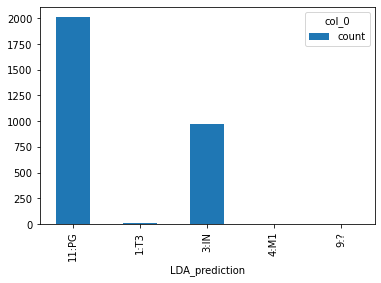

In [77]:
my_crosstab.plot.bar()

### Trying without interneurons

In [78]:
LDA_new = LinearDiscriminantAnalysis()

In [25]:
st_table.no_num.unique()

array(['T2', 'T3', 'M2B', 'IN', 'M1', 'T1', ':ET1', 'M2', '?', 'ET2',
       ':PG', ':??', 'M3'], dtype=object)

In [79]:
non_IN_indices = [index for index in st_matrix.index if st_table.loc[index,'no_num'] not in ['IN','?',':??'] ]

In [80]:
st_table.loc[non_IN_indices]

louvain no_num
AAAGAACCATCTGTTT-1-0    0:T2     T2
AAAGGATAGCACCGTC-1-0    0:T2     T2
AAAGGATTCAAACCTG-1-0    1:T3     T3
AAAGGGCCAAGCGCAA-1-0    0:T2     T2
AAAGGGCTCGTAGCTA-1-0   2:M2B    M2B
...                      ...    ...
TTTCCTCGTTAGAGTA-1-1   2:M2B    M2B
TTTGACTCATCGGAGA-1-1    0:T2     T2
TTTGATCAGTTGTAGA-1-1    1:T3     T3
TTTGGTTGTGACATCT-1-1   2:M2B    M2B
TTTGTTGAGGCCTGAA-1-1    1:T3     T3

[1994 rows x 2 columns]

In [81]:
st_subset = st_matrix[[col for col in st_matrix.columns if col in sim_matrix]]

In [97]:
#scaling data - didn't work out
scaler = sklearn.preprocessing.MinMaxScaler()

st_subset = st_matrix[[col for col in st_matrix.columns if col in sim_matrix]]
st_T = st_subset.loc[non_IN_indices].T
st_T[st_T.columns] = scaler.fit_transform(st_T[st_T.columns])
new_st_matrix = st_T.T

sim_T = sim_matrix.T
sim_T[sim_T.columns] = scaler.fit_transform(sim_T[sim_T.columns])
new_sim_matrix = sim_T.T

In [104]:
#LDA_new.fit(st_matrix_LDA.loc[non_IN_indices],st_table.loc[non_IN_indices,'no_num'])
LDA_new.fit(st_subset.loc[non_IN_indices],st_table.loc[non_IN_indices,'no_num'])
#LDA_new.fit(new_st_matrix.loc[non_IN_indices],st_table.loc[non_IN_indices,'no_num'])

LinearDiscriminantAnalysis()

In [91]:
sim_table

general_dataset specific_dataset
0                PCX            PCX_1
1                PCX            PCX_1
2                PCX            PCX_1
3                PCX            PCX_1
4                PCX            PCX_1
...              ...              ...
2995             AON            AON_3
2996             AON            AON_3
2997             AON            AON_3
2998             AON            AON_3
2999             AON            AON_3

[3000 rows x 2 columns]

In [105]:
sim_table['new_prediction'] = LDA_new.predict(sim_matrix[[col for col in st_matrix.columns if col in sim_matrix.columns]])
#sim_table['new_prediction'] = LDA_new.predict(new_sim_matrix[[col for col in st_matrix.columns if col in sim_matrix.columns]])

In [106]:
sim_table

general_dataset specific_dataset new_prediction
0                PCX            PCX_1            :PG
1                PCX            PCX_1            :PG
2                PCX            PCX_1            :PG
3                PCX            PCX_1            :PG
4                PCX            PCX_1            :PG
...              ...              ...            ...
2995             AON            AON_3            :PG
2996             AON            AON_3            :PG
2997             AON            AON_3            :PG
2998             AON            AON_3            :PG
2999             AON            AON_3            :PG

[3000 rows x 3 columns]

In [94]:
def specific_crosstab(table):
    my_crosstab1 = pd.crosstab(#index = table[index_col],  # Make a crosstab
                              #columns="count"
                              index = table.new_prediction,
                              columns = table.specific_dataset
                             )
    my_crosstab1.plot.bar()

def general_crosstab(table):
    my_crosstab1 = pd.crosstab(#index = table[index_col],  # Make a crosstab
                              #columns="count"
                              index = table.new_prediction,
                              columns = table.general_dataset
                             )
    my_crosstab1.plot.bar()

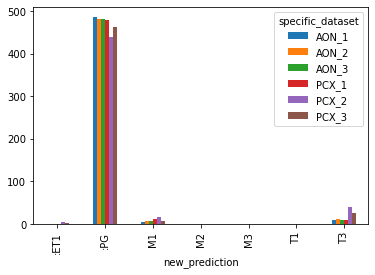

In [107]:
specific_crosstab(sim_table)

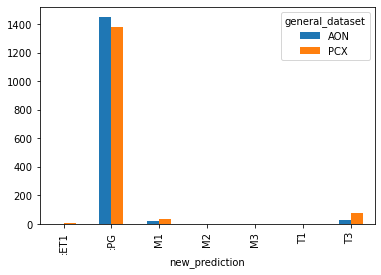

In [108]:
general_crosstab(sim_table)

# looking at Sara's mitral/tufted markers in bulk counts to make sure names are right

In [109]:
bulk_counts = pd.read_pickle('../../OB_single_seq_data/bulk_counts.p')

In [113]:
#Sara's mitral markers
mitral = ['Adgrl2','Doc2b','C1ql1','Sertm1','Kcng1','Cntn6','Ebf1','Samsn1','Ros1','Nts','Piezo2','Cadps2','Calca','Ednra','Ets1']

bulk_counts[mitral]

Adgrl2  Doc2b  C1ql1  Sertm1  Kcng1  Cntn6   Ebf1  Samsn1  Ros1   Nts  \
PCX_1    96.0   33.0   25.0    10.0    2.0   74.0  144.0    41.0   3.0  52.0   
PCX_2    42.0    1.0   36.0    13.0   28.0   70.0  182.0    67.0   2.0  68.0   
PCX_3    37.0    0.0   13.0    13.0    0.0   39.0  157.0    88.0   4.0  30.0   
AON_1    77.0   11.0   27.0    38.0   49.0  267.0  112.0   166.0   1.0  53.0   
AON_2    80.0   14.0   13.0    48.0   51.0  229.0  117.0   143.0   1.0  79.0   
AON_3    48.0   21.0   39.0    33.0   41.0  254.0   83.0   304.0   2.0  96.0   

       Piezo2  Cadps2  Calca  Ednra   Ets1  
PCX_1    14.0   644.0   75.0   68.0  164.0  
PCX_2    37.0   408.0    7.0   73.0   54.0  
PCX_3   113.0   436.0   14.0    6.0   23.0  
AON_1    46.0   244.0   88.0  124.0  272.0  
AON_2    16.0   163.0  128.0  100.0  101.0  
AON_3     5.0   206.0  210.0   96.0   96.0

In [119]:
tufted = ['Ly6g6e','Siah3','Itga8','Igfbp2','Galnt12','Trp73','Lhx1','Ebf3','Ebf2','Gm27199','Edn1','Coch','Rorb',
         'Chst9','Tpbgl','Wnt5b','Sgcg','Vdr','Olfr111','Olfr112','Olfr114','Barhl2','Olfr115']
pd.set_option('display.max_columns', len(tufted))
bulk_counts[tufted].to_csv('bulk_counts_tufted_markers.csv')

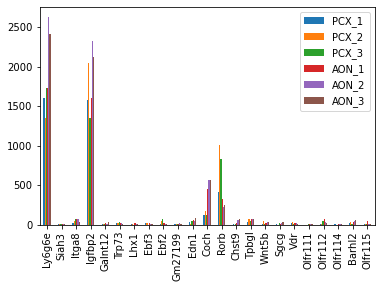

In [117]:
bulk_counts[tufted].T.plot.bar()

# Quantifying UMAP overlap (voting)

In [145]:
num_votes = 15

### Load data

In [120]:
sim_umap = pickle.load(open(os.path.join(SIM_FOLDER,'simulation_UMAP.p'),'rb'))

In [121]:
st_umap = pickle.load(open(os.path.join(SIM_FOLDER,'standard_UMAP.p'),'rb'))

In [13]:
SIM_FOLDER

'../../simulated-nuclei_data/OB_pyscenic/final_regulons/TF_times_3_good_replicates'

In [95]:
scvi_folder = os.path.join(SIM_FOLDER,'1000_epochs_mitral_only')

In [96]:
sim_umap = pickle.load(open(os.path.join(scvi_folder,'sim_umap.p'),'rb'))

In [97]:
st_umap = pickle.load(open(os.path.join(scvi_folder,'st_umap.p'),'rb'))

In [122]:
#seurat
st_table['umap0'] = st_umap[:,0]
st_table['umap1'] = st_umap[:,1]

sim_table['umap0'] = sim_umap[:,0]
sim_table['umap1'] = sim_umap[:,1]

In [31]:
len(st_umap)

2161

In [98]:
#scvi
st_table['umap0'] = st_table['umap0']
st_table['umap1'] = st_table['umap1']

sim_table['umap0'] = sim_table['umap0']
sim_table['umap1'] = sim_table['umap1']

In [ ]:
sim_table

In [ ]:
st_table

### Get ready to actually vote

In [129]:
def nearest_clusters(sim_point,attribute,table):
    #takes in sim_point
    #returns 'attribute' of 10 closest standard points
    distance = pd.Series(np.linalg.norm(sim_point - table[['umap0','umap1']].values, axis=1),index = table.index)
    nearest_indices = distance.nsmallest(num_votes).index
    return table.loc[nearest_indices,attribute]

In [180]:
#nearest_clusters(test_point,'louvain')

In [106]:
## simulation voting for standard
umap_votes = pd.DataFrame(0,index=sim_table.specific_dataset.unique(),columns = ['M1','M2','M3'])

for sim_index,sim_row in sim_table.iterrows():
    point = (sim_row['umap0'],sim_row['umap1'])
    for cluster in nearest_clusters(point,'louvain',st_table):
        umap_votes.loc[sim_row['specific_dataset'],cluster] += 1

umap_votes.index=['PCX','AON']
umap_votes

M1     M2     M3
PCX  22221  39841  12938
AON  46133    461  28406

In [130]:
## standard voting for simulation

umap_votes = pd.DataFrame(0,index=['M1','M2','M3'], columns = sim_table.specific_dataset.unique())

for sim_index,sim_row in st_table.iterrows():
    point = (sim_row['umap0'],sim_row['umap1'])
    for cluster in nearest_clusters(point,'specific_dataset',sim_table):
        umap_votes.loc[sim_row['louvain'],cluster] += 1

#umap_votes.columns=['PCX','AON']
umap_votes

PCX_3  AON_2
M1  19079  15221
M2  57227    223
M3   8625   7675

In [58]:
sim_table.specific_dataset.unique()

array(['PCX_3', 'AON_2'], dtype=object)

#### all clusters

In [131]:
normalized_votes = umap_votes.div(umap_votes.sum(axis=0), axis=1) #normalize by column (cluster) #what Datta does
#normalized_votes = umap_votes.div(umap_votes.sum(axis=1), axis=0) #normalize by row (dataset)

#### only mitral

In [191]:
mitral_only = umap_votes[ordered_standard_names[0:3]]
#normalized_votes = mitral_only.div(mitral_only.sum(axis=1), axis=0) #normalize by row (dataset)
normalized_votes = mitral_only.div(mitral_only.sum(axis=0), axis=1) #normalize by column (cluster)

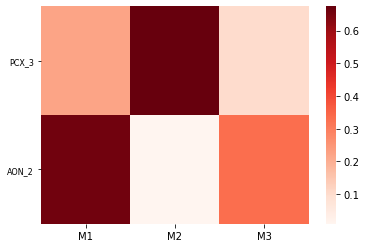

In [132]:
umap_votes_plot = sns.heatmap(normalized_votes.T,cmap = "Reds")
umap_votes_plot.set_yticklabels(umap_votes_plot.get_yticklabels(), rotation = 0, fontsize = 8)
umap_votes_fig = umap_votes_plot.get_figure()

fname = os.path.join(SIM_FOLDER,'mitral_umap_50_votes_st4sim.png')
umap_votes_fig.savefig(fname,bbox_inches='tight')

# PCA voting

### Optional: filtering to match any filtering done before Seurat

In [201]:
sim_table = sim_table.loc[[cell for cell in sim_table.index if sim_table.loc[cell,'specific_dataset'] in ['PCX_3','AON_2']]]

In [209]:
st_table = st_table.loc[[cell for cell in st_table.index if st_table.loc[cell,'no_num'] in ['M1','M2','M2B','M3']]]
st_table = st_table.replace('M2B','M2')

In [212]:
sim_matrix = sim_matrix.loc[[cell for cell in sim_table.index]]
st_matrix = st_matrix.loc[[cell for cell in st_table.index]]

### Load data

In [37]:
sim_pca = pickle.load(open(os.path.join(SIM_FOLDER,'simulation_PCA.p'),'rb'))

In [38]:
st_pca = pickle.load(open(os.path.join(SIM_FOLDER,'standard_PCA.p'),'rb'))

In [235]:
sim_pca

array([[-3.95448394,  1.37352212],
       [-4.43469806,  0.62152561],
       [-2.66896148,  0.79612716],
       ...,
       [ 7.97278301, -2.7793676 ],
       [ 6.87189941, -3.48273484],
       [ 7.8902071 , -3.92792527]])

In [39]:
sim_pca_table = pd.DataFrame(sim_pca,index=sim_table.index)

In [ ]:
sim_pca_table

In [ ]:
st_pca_table = pd.DataFrame(st_pca,index=st_table.index)

In [ ]:
st_pca_table

In [ ]:
test_point = sim_pca_table.loc[0].values

In [ ]:
st_pca_table.values

### Get ready to actually vote

In [146]:
def nearest_clusters_pca(sim_point,attribute,sim4st = True):
    #takes in sim_point
    #returns 'attribute' of 10 closest standard points
    if sim4st:
        distance = pd.Series(np.linalg.norm(sim_point - st_pca_table.values, axis=1),index = st_table.index)
        nearest_indices = distance.nsmallest(num_votes).index
        return st_table.loc[nearest_indices,attribute]
    else:
        distance = pd.Series(np.linalg.norm(sim_point - sim_pca_table.values, axis=1),index = sim_table.index)
        nearest_indices = distance.nsmallest(num_votes).index
        return sim_table.loc[nearest_indices,attribute]

In [ ]:
nearest_clusters_pca(test_point,'louvain')

In [ ]:
sim_table

In [135]:
### sim voting for standard

#pca_votes = pd.DataFrame(0,index=sim_table.specific_dataset.unique(),columns = st_table.louvain.unique())
#pca_votes = pd.DataFrame(0,index=sim_table.specific_dataset.unique(),columns = ordered_standard_names)
pca_votes = pd.DataFrame(0,index=sim_table.specific_dataset.unique(),columns = ['M1','M2','M3'])

for sim_index,sim_row in sim_table.iterrows():
    point = sim_pca_table.loc[sim_index].values
    #print(point)
    for cluster in nearest_clusters_pca(point,'louvain'):
        pca_votes.loc[sim_row['specific_dataset'],cluster] += 1

pca_votes.index=['PCX','AON']
pca_votes

M1     M2     M3
PCX  14412  54554   6034
AON  50832   1272  22896

In [147]:
### standard voting for simulation

#pca_votes = pd.DataFrame(0,index=sim_table.specific_dataset.unique(),columns = st_table.louvain.unique())
#pca_votes = pd.DataFrame(0,index=sim_table.specific_dataset.unique(),columns = ordered_standard_names)
pca_votes = pd.DataFrame(0,index=['M1','M2','M3'], columns = sim_table.general_dataset.unique())
#pca_votes = pd.DataFrame(0,index=sim_table.specific_dataset.unique(), columns = ['M1','M2','M3'])

for sim_index,sim_row in st_table.iterrows():
    point = st_pca_table.loc[sim_index].values
    #print(point)
    for cluster in nearest_clusters_pca(point,'general_dataset',sim4st=False):
        pca_votes.loc[sim_row['louvain'],cluster] += 1

#pca_votes.index=['PCX','AON']
pca_votes

PCX   AON
M1   5906  4384
M2  17176    59
M3   2551  2339

#### all clusters

In [148]:
normalized_votes = pca_votes.div(pca_votes.sum(axis=0), axis=1) #normalize by column (cluster)
#normalized_votes = pca_votes.div(pca_votes.sum(axis=1), axis=0) #normalize by row (dataset)

#### only mitral

In [123]:
#mitral_only = pca_votes[ordered_standard_names[0:3]]
#normalized_votes = mitral_only.div(mitral_only.sum(axis=1), axis=0) #normalize by row (dataset)
#normalized_votes = mitral_only.div(mitral_only.sum(axis=0), axis=1) #normalize by column (cluster)

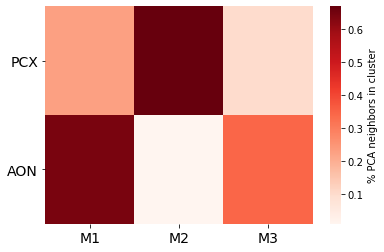

In [149]:
pca_votes_plot = sns.heatmap(normalized_votes.T,cmap = "Reds",cbar_kws={'label': '% PCA neighbors in cluster'})
pca_votes_plot.set_yticklabels(pca_votes_plot.get_yticklabels(), rotation = 0, fontsize = 14)
pca_votes_plot.set_xticklabels(pca_votes_plot.get_xticklabels(), fontsize = 14)
pca_votes_fig = pca_votes_plot.get_figure()

fname = os.path.join(SIM_FOLDER,'pca_15_votes_st4sim.png')
#fname = 'filtered_UMAP.png'
pca_votes_fig.savefig(fname,bbox_inches='tight')